CHINA Dataset

In [ ]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

C_population = r'/Users/ravindra1/Downloads/CHINApopulation.csv'
C_populationgrowth = r'/Users/ravindra1/Downloads/CHINApopulationgrowth.csv'
C_consumption = r'/Users/ravindra1/Downloads/CHINAconsumption.csv'
C_govconsumption = r'/Users/ravindra1/Downloads/CHINAgovconsumption.csv'
C_unemployemnt = r'/Users/ravindra1/Downloads/CHINAunemployemnt.csv'
C_gni = r'/Users/ravindra1/Downloads/CHINAgni.csv'

C_lending = r'/Users/ravindra1/Downloads/CHINAlending.csv'
C_inflation = r'/Users/ravindra1/Downloads/CHINAinflation.csv'

#   FOR HEATMAP, CORRELATION INDEPENDENT VAR CHECK
#   https://www.geeksforgeeks.org/data-science/create-a-correlation-matrix-using-python/

pd.set_option('display.max_rows', None)
#  Expected Value  y
china_consumption = pd.read_csv(C_consumption)

#  Predictor Value X
china_population = pd.read_csv(C_population)
china_govconsumption = pd.read_csv(C_govconsumption)
china_growth = pd.read_csv(C_populationgrowth)
china_unemployment = pd.read_csv(C_unemployemnt)
china_gni = pd.read_csv(C_gni)

china_lending = pd.read_csv(C_lending)
china_inflation = pd.read_csv(C_inflation)

china_inflation

US Dataset

In [117]:
U_population = r'/Users/ravindra1/Downloads/USpopulation.csv'
U_populationgrowth = r'/Users/ravindra1/Downloads/USpopulationgrowth.csv'
U_consumption = r'/Users/ravindra1/Downloads/USconsumption.csv'
U_govconsumption = r'/Users/ravindra1/Downloads/USgovconsumption.csv'
U_unemployemnt = r'/Users/ravindra1/Downloads/USunemployment.csv'
U_gni = r'/Users/ravindra1/Downloads/USgni.csv'

U_inflation = r'/Users/ravindra1/Downloads/USinflation.csv'
U_lending = r'/Users/ravindra1/Downloads/USlending.csv'

#  Expected Value  y
us_consumption = pd.read_csv(U_consumption)

#  Predictor Value X
us_population = pd.read_csv(U_population)
us_govconsumption = pd.read_csv(U_govconsumption)
us_growth = pd.read_csv(U_populationgrowth)
us_unemployment = pd.read_csv(U_unemployemnt)
us_gni = pd.read_csv(U_gni)

us_inflation = pd.read_csv(U_inflation)
us_lending = pd.read_csv(U_lending)



MERGING THE DATASET

In [118]:

def keep_second_column(df):
    new_df = df.iloc[:, [0, 1]]       # keep first column (Year) and second column
    new_df.columns = ["Year", new_df.columns[1]]   # rename first column to "Year"
    return new_df

df1_clean = keep_second_column(china_population)
df2_clean = keep_second_column(china_govconsumption)
df3_clean = keep_second_column(china_growth)
df4_clean = keep_second_column(china_unemployment)
df5_clean = keep_second_column(china_gni)
df6_clean = keep_second_column(china_inflation)
df7_clean = keep_second_column(china_lending)

u1c = keep_second_column(us_population)
u2c = keep_second_column(us_govconsumption)
u3c = keep_second_column(us_growth)
u4c = keep_second_column(us_unemployment)
u5c = keep_second_column(us_gni)
u6c = keep_second_column(us_inflation)
u7c = keep_second_column(us_lending)


# ---- Step 2: Merge all dataframes by Year ----

dfs = [df1_clean, df2_clean, df3_clean, df4_clean, df5_clean, df6_clean, df7_clean]
ufs = [u1c, u2c, u3c, u4c, u5c, u6c, u7c]

china_merged = dfs[0]
for d in dfs[1:]:
    china_merged = china_merged.merge(d, on="Year", how="inner")
    
us_merged = ufs[0]
for u in ufs [1:]:
    us_merged = us_merged.merge(u, on="Year", how='inner')

us_merged

,Year,"Population, total",General government final consumption expenditure (current US$),Population growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)",GNI (current US$),"Inflation, consumer prices (annual %)",Lending interest rate (%)
0,1994,263126000,1108101000000,1.226296,6.119,7310202000000,2.607442,7.138333
1,1995,266278000,1141743000000,1.190787,5.650,7667701000000,2.805420,8.829167
2,1996,269394000,1172889000000,1.163412,5.451,8103991000000,2.931204,8.270833
3,1997,272657000,1220529000000,1.203960,5.000,8600853000000,2.337690,8.441667
4,1998,275854000,1267608000000,1.165715,4.511,9080228000000,1.552279,8.354167
5,1999,279040000,1351428000000,1.148340,4.219,9662075000000,2.188027,7.994167
6,2000,282162411,1437588000000,1.112769,3.992,10289432000000,3.376857,9.233333
7,2001,284968955,1538151000000,0.989741,4.731,10632293000000,2.826171,6.921667
8,2002,287625193,1645818000000,0.927797,5.783,10974902000000,1.586032,4.675000
9,2003,290107933,1746378000000,0.859482,5.989,11514946000000,2.270095,4.122500


In [ ]:
scatterplot each var???

SET UP FULL CHINA DATASET

In [119]:
# 1. Combine dependent + predictors into one dataframe
dfchina = china_merged.copy()
dfchina['HCE'] = china_consumption['Households and NPISHs Final consumption expenditure (current US$)']

# compute differenced logs
for col in ['HCE', 'GNI (current US$)', 'Population, total', 'General government final consumption expenditure (current US$)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']:
    dfchina[f'dlog_{col}'] = np.log(dfchina[col]).diff()

dfchina['diff_Lending interest rate (%)'] = dfchina['Lending interest rate (%)'].diff()

# --- China Crisis Dummies ---
dfchina['crisis_AFC'] = dfchina['Year'].isin([1997, 1998]).astype(int)
dfchina['crisis_GFC'] = dfchina['Year'].isin([2008, 2009]).astype(int)


# drop the first row (NaNs)
#dfchina = dfchina.dropna()
dfchina = dfchina.iloc[1:].reset_index(drop=True)

dfchina

,Year,"Population, total",General government final consumption expenditure (current US$),Population Growth Rate,"Unemployment, total (% of total labor force) (modeled ILO estimate)",GNI (current US$),"Inflation, consumer prices (annual %)",Lending interest rate (%),HCE,dlog_HCE,dlog_GNI (current US$),"dlog_Population, total",dlog_General government final consumption expenditure (current US$),"dlog_Unemployment, total (% of total labor force) (modeled ILO estimate)",diff_Lending interest rate (%),crisis_AFC,crisis_GFC
0,1995,1204855000,9.932087e+10,0.0109,3.00,7.264180e+11,16.791225,12.06,3.378229e+11,0.301700,0.249718,0.010865,0.206988,0.033902,1.08,0,0
1,1996,1217550000,1.159081e+11,0.0105,3.12,8.560861e+11,8.313160,10.08,4.072190e+11,0.186829,0.164245,0.010481,0.154442,0.039221,-1.98,0,0
2,1997,1230075000,1.345760e+11,0.0103,3.23,9.567497e+11,2.786465,8.64,4.445997e+11,0.087823,0.111171,0.010235,0.149331,0.034649,-1.44,1,0
3,1998,1241935000,1.565765e+11,0.0096,3.24,1.020491e+12,-0.773186,6.39,4.722490e+11,0.060332,0.064497,0.009596,0.151416,0.003091,-2.25,1,0
4,1999,1252735000,1.822680e+11,0.0087,3.25,1.089373e+12,-1.401473,5.85,5.103289e+11,0.077549,0.065318,0.008659,0.151934,0.003082,-0.54,0,0
5,2000,1262645000,2.078359e+11,0.0079,3.26,1.209090e+12,0.347811,5.85,5.721215e+11,0.114296,0.104266,0.007880,0.131271,0.003072,0.00,0,0
6,2001,1271850000,2.244696e+11,0.0073,3.80,1.335863e+12,0.719126,5.85,6.174711e+11,0.076281,0.099709,0.007264,0.076992,0.153274,0.00,0,0
7,2002,1280400000,2.416987e+11,0.0067,4.24,1.474877e+12,-0.731971,5.31,6.701835e+11,0.081919,0.098997,0.006700,0.073952,0.109562,-0.54,0,0
8,2003,1288400000,2.603840e+11,0.0062,4.58,1.673685e+12,1.127603,5.31,7.208002e+11,0.072810,0.126453,0.006229,0.074465,0.077136,0.00,0,0
9,2004,1296075000,2.932027e+11,0.0060,4.49,1.979064e+12,3.824637,5.58,8.084996e+11,0.114818,0.167596,0.005939,0.118707,-0.019846,0.27,0,0


SET UP FULL US DATASET

In [120]:
# 1. Combine dependent + predictors into one dataframe
dfus = us_merged.copy()
dfus['HCE'] = us_consumption['Households and NPISHs Final consumption expenditure (current US$)']

# compute differenced logs
for col in ['HCE', 'GNI (current US$)', 'Population, total', 'General government final consumption expenditure (current US$)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Lending interest rate (%)']:
    dfus[f'dlog_{col}'] = np.log(dfus[col]).diff()

dfus['diff_Lending interest rate (%)'] = dfus['Lending interest rate (%)'].diff()

# --- US Crisis Dummies ---
dfus['crisis_GFC'] = dfus['Year'].isin([2008, 2009]).astype(int)
dfus['crisis_AFC'] = dfus['Year'].isin([1997, 1998]).astype(int)   # optional for US

# drop the first row (NaNs)
dfus = dfus.dropna()

dfus

,Year,"Population, total",General government final consumption expenditure (current US$),Population growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)",GNI (current US$),"Inflation, consumer prices (annual %)",Lending interest rate (%),HCE,dlog_HCE,dlog_GNI (current US$),"dlog_Population, total",dlog_General government final consumption expenditure (current US$),"dlog_Unemployment, total (% of total labor force) (modeled ILO estimate)",dlog_Lending interest rate (%),diff_Lending interest rate (%),crisis_GFC,crisis_AFC
1,1995,266278000,1141743000000,1.190787,5.650,7667701000000,2.805420,8.829167,4962590000000,0.049915,0.047746,0.011908,0.029908,-0.079743,0.212581,1.690833,0,0
2,1996,269394000,1172889000000,1.163412,5.451,8103991000000,2.931204,8.270833,5244596000000,0.055270,0.055340,0.011634,0.026914,-0.035856,-0.065325,-0.558333,0,0
3,1997,272657000,1220529000000,1.203960,5.000,8600853000000,2.337690,8.441667,5536790000000,0.054217,0.059505,0.012040,0.039814,-0.086361,0.020444,0.170833,0,1
4,1998,275854000,1267608000000,1.165715,4.511,9080228000000,1.552279,8.354167,5877248000000,0.059674,0.054238,0.011657,0.037847,-0.102919,-0.010419,-0.087500,0,1
5,1999,279040000,1351428000000,1.148340,4.219,9662075000000,2.188027,7.994167,6283758000000,0.066880,0.062109,0.011483,0.064030,-0.066921,-0.044048,-0.360000,0,0
6,2000,282162411,1437588000000,1.112769,3.992,10289432000000,3.376857,9.233333,6767179000000,0.074116,0.062909,0.011128,0.061805,-0.055306,0.144108,1.239167,0,0
7,2001,284968955,1538151000000,0.989741,4.731,10632293000000,2.826171,6.921667,7073801000000,0.044314,0.032779,0.009897,0.067614,0.169844,-0.288164,-2.311667,0,0
8,2002,287625193,1645818000000,0.927797,5.783,10974902000000,1.586032,4.675000,7348941000000,0.038158,0.031715,0.009278,0.067656,0.200786,-0.392427,-2.246667,0,0
9,2003,290107933,1746378000000,0.859482,5.989,11514946000000,2.270095,4.122500,7740749000000,0.051942,0.048035,0.008595,0.059306,0.035002,-0.125769,-0.552500,0,0
10,2004,292805298,1851920000000,0.925484,5.529,12293909000000,2.677237,4.340000,8231960000000,0.061526,0.065458,0.009255,0.058679,-0.079917,0.051415,0.217500,0,0


US CORRELATION MATRIX

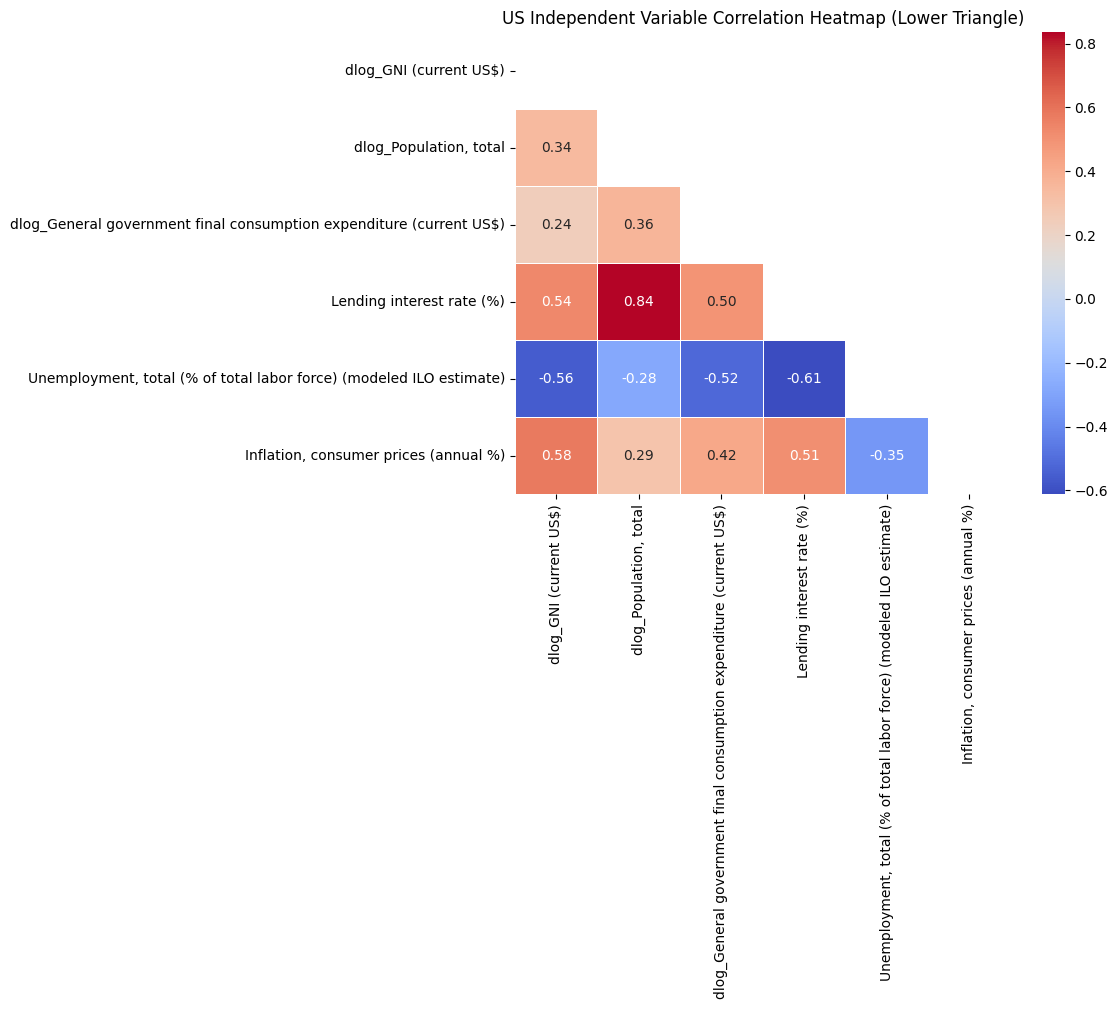

In [121]:
coreck_us = [
    "dlog_GNI (current US$)",
    "dlog_Population, total",
    "dlog_General government final consumption expenditure (current US$)",
    "Lending interest rate (%)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Inflation, consumer prices (annual %)"
]

corr_check_us = dfus[coreck_us].copy()

matrix = corr_check_us.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))   # mask upper triangle

plt.figure(figsize=(8,6))
sns.heatmap(
    matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5,
    mask=mask
)
plt.title("US Independent Variable Correlation Heatmap (Lower Triangle)")
plt.show()

CHINA CORRELATION MATRIX

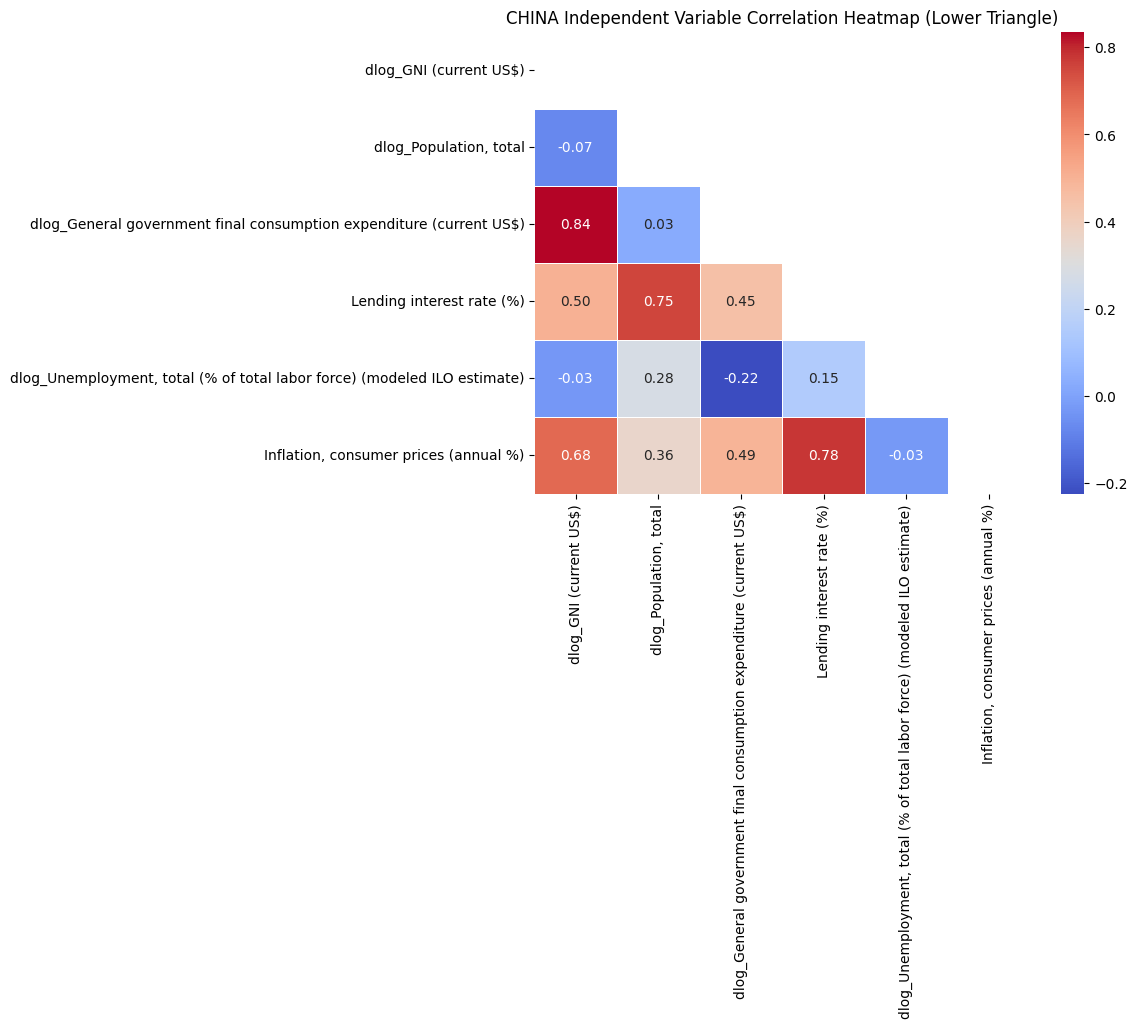

In [114]:
coreck_china = [
    "dlog_GNI (current US$)",
    "dlog_Population, total",
    "dlog_General government final consumption expenditure (current US$)",
    "Lending interest rate (%)",
    "dlog_Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Inflation, consumer prices (annual %)"
]

corr_check_china = dfchina[coreck_china].copy()

matrix = corr_check_china.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))   # mask upper triangle

plt.figure(figsize=(8,6))
sns.heatmap(
    matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5,
    mask=mask
)
plt.title("CHINA Independent Variable Correlation Heatmap (Lower Triangle)")
plt.show()

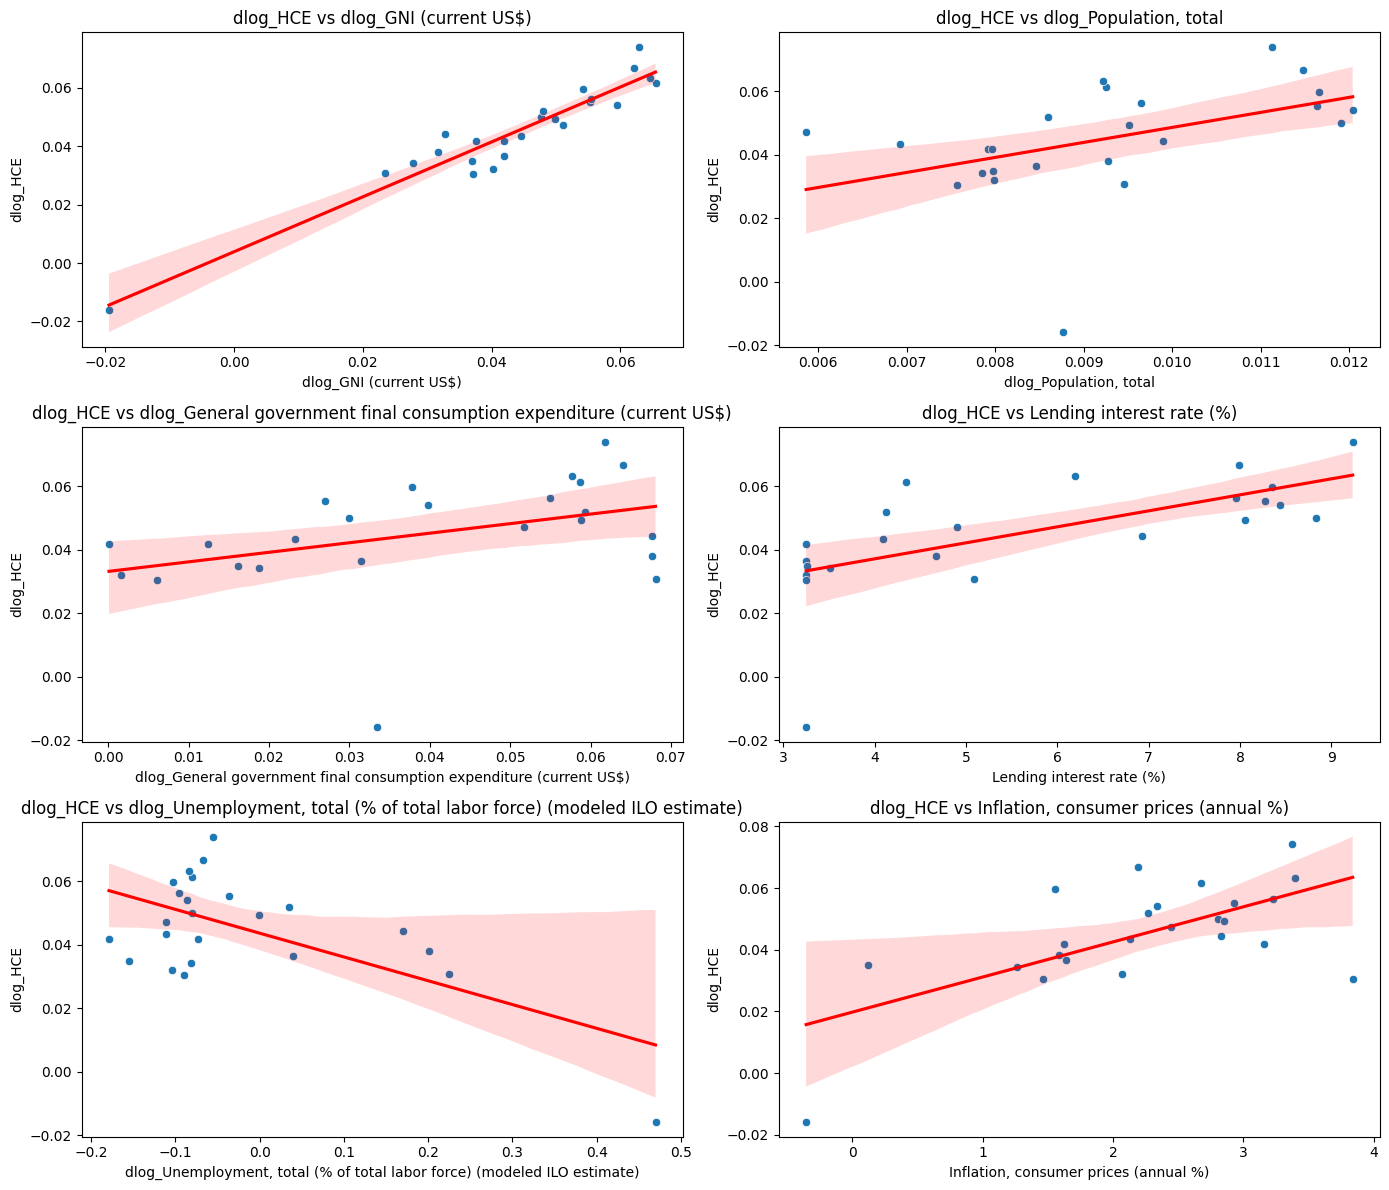

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your linearity target variable
ylinear = "dlog_HCE"

# Your predictors for linearity detection
xlinear = [
    "dlog_GNI (current US$)",
    "dlog_Population, total",
    "dlog_General government final consumption expenditure (current US$)",
    "Lending interest rate (%)",
    "dlog_Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Inflation, consumer prices (annual %)"
]

plt.figure(figsize=(14, 12))

for i, x in enumerate(xlinear, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=dfus[x], y=dfus[ylinear])
    sns.regplot(x=dfus[x], y=dfus[ylinear], scatter=False, color="red")
    plt.xlabel(x)
    plt.ylabel(ylinear)
    plt.title(f"{ylinear} vs {x}")

plt.tight_layout()
plt.show()


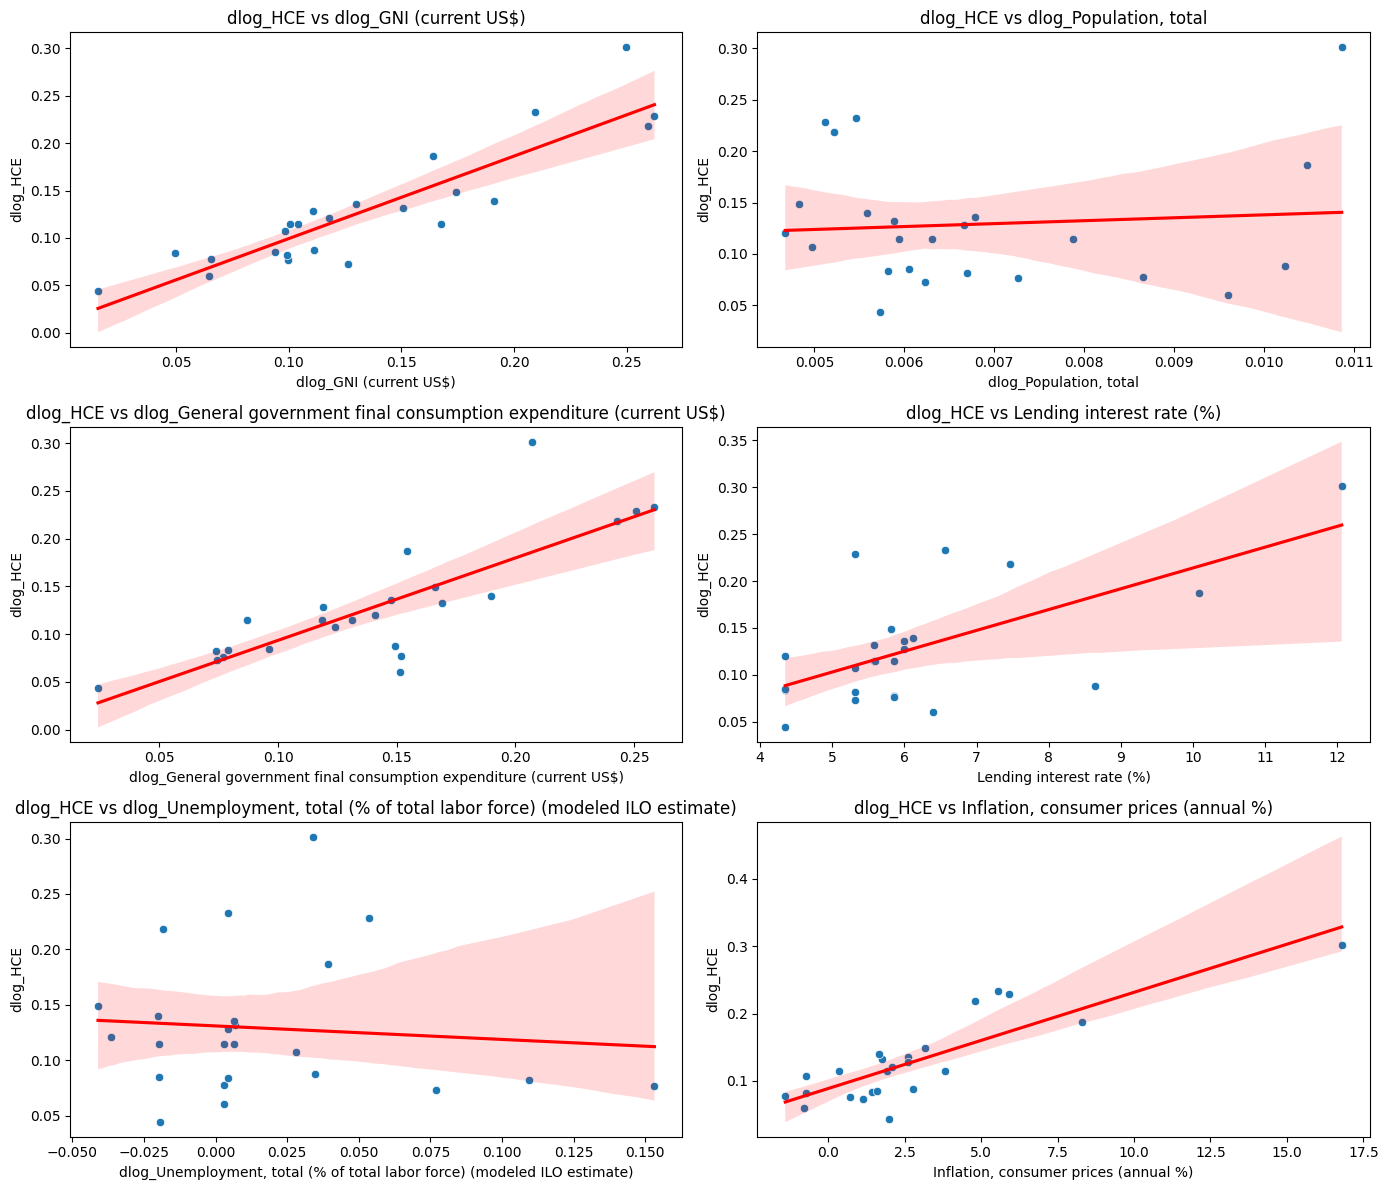

In [42]:
plt.figure(figsize=(14, 12))

for i, x in enumerate(xlinear, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=dfchina[x], y=dfchina[ylinear])
    sns.regplot(x=dfchina[x], y=dfchina[ylinear], scatter=False, color="red")
    plt.xlabel(x)
    plt.ylabel(ylinear)
    plt.title(f"{ylinear} vs {x}")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, variables):
    """
    Calculate VIF for a list of independent variables.
    
    Parameters:
        df: DataFrame containing your data
        variables: list of column names you want to calculate VIF for
    
    Returns:
        DataFrame with VIF values
    """
    X = df[variables].copy()
    X = sm.add_constant(X)  # Add intercept for VIF calculation

    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]
    
    return vif_data

variables = [
    'GNI (current US$)',
    'Population, total',
    'General government final consumption expenditure (current US$)',
    'Lending interest rate (%)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Inflation, consumer prices (annual %)'

    # 'log_GNI (current US$)',
    # 'log_Population, total',
    # 'log_General government final consumption expenditure (current US$)',
    # 'log_Lending interest rate (%)',
    # 'log_Unemployment, total (% of total labor force) (modeled ILO estimate)',
    # 'log_Inflation, consumer prices (annual %)'
]

vif_result = calculate_vif(us_merged, variables)
print(vif_result)


In [122]:
final_list = [
    "Year",
    "dlog_HCE",
    "dlog_GNI (current US$)",
    "dlog_Population, total",
    "dlog_General government final consumption expenditure (current US$)",
    "Lending interest rate (%)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Inflation, consumer prices (annual %)",
    "crisis_GFC",
    "crisis_AFC"
]

dfus = dfus[final_list]
dfchina = dfchina[final_list]

In [123]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm




# 2. Fit OLS regression model with corrected formula
formula_china = '''
dlog_HCE ~ 
    Q("dlog_GNI (current US$)") + 
    Q("dlog_Population, total") +
    Q("dlog_General government final consumption expenditure (current US$)") +
    Q("Lending interest rate (%)") +
    Q("Unemployment, total (% of total labor force) (modeled ILO estimate)") +
    Q("Inflation, consumer prices (annual %)") +
    Q("crisis_GFC") +
    Q("crisis_AFC")
'''

model = smf.ols(formula=formula_china, data=dfchina).fit()

# 3. ANOVA table
anova_results = anova_lm(model, typ=2)
#print(anova_results)

# 4. Regression summary
#print(model.summary())

model = smf.ols(formula_china, data=dfchina).fit()
print(model.summary())

dfchina

                            OLS Regression Results                            
Dep. Variable:               dlog_HCE   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     78.92
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           7.33e-11
Time:                        00:41:43   Log-Likelihood:                 77.871
No. Observations:                  24   AIC:                            -137.7
Df Residuals:                      15   BIC:                            -127.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

,Year,dlog_HCE,dlog_GNI (current US$),"dlog_Population, total",dlog_General government final consumption expenditure (current US$),Lending interest rate (%),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",crisis_GFC,crisis_AFC
0,1995,0.301700,0.249718,0.010865,0.206988,12.06,3.00,16.791225,0,0
1,1996,0.186829,0.164245,0.010481,0.154442,10.08,3.12,8.313160,0,0
2,1997,0.087823,0.111171,0.010235,0.149331,8.64,3.23,2.786465,0,1
3,1998,0.060332,0.064497,0.009596,0.151416,6.39,3.24,-0.773186,0,1
4,1999,0.077549,0.065318,0.008659,0.151934,5.85,3.25,-1.401473,0,0
5,2000,0.114296,0.104266,0.007880,0.131271,5.85,3.26,0.347811,0,0
6,2001,0.076281,0.099709,0.007264,0.076992,5.85,3.80,0.719126,0,0
7,2002,0.081919,0.098997,0.006700,0.073952,5.31,4.24,-0.731971,0,0
8,2003,0.072810,0.126453,0.006229,0.074465,5.31,4.58,1.127603,0,0
9,2004,0.114818,0.167596,0.005939,0.118707,5.58,4.49,3.824637,0,0


In [124]:

# 2. Fit OLS regression model with corrected formula
formula_us = '''
dlog_HCE ~ 
    Q("dlog_GNI (current US$)") + 
    Q("dlog_Population, total") +
    Q("dlog_General government final consumption expenditure (current US$)") +
    Q("Lending interest rate (%)") +
    Q("Unemployment, total (% of total labor force) (modeled ILO estimate)") +
    Q("Inflation, consumer prices (annual %)") +
    Q("crisis_GFC") +
    Q("crisis_AFC")
'''

model = smf.ols(formula=formula_us, data=dfus).fit()

# 3. ANOVA table
anova_results = anova_lm(model, typ=2)
#print(anova_results)

# 4. Regression summary
#print(model.summary())

model = smf.ols(formula_us, data=dfus).fit()
print(model.summary())

dfus

                            OLS Regression Results                            
Dep. Variable:               dlog_HCE   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     56.03
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           8.70e-10
Time:                        00:41:58   Log-Likelihood:                 104.42
No. Observations:                  24   AIC:                            -190.8
Df Residuals:                      15   BIC:                            -180.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

,Year,dlog_HCE,dlog_GNI (current US$),"dlog_Population, total",dlog_General government final consumption expenditure (current US$),Lending interest rate (%),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",crisis_GFC,crisis_AFC
1,1995,0.049915,0.047746,0.011908,0.029908,8.829167,5.650,2.805420,0,0
2,1996,0.055270,0.055340,0.011634,0.026914,8.270833,5.451,2.931204,0,0
3,1997,0.054217,0.059505,0.012040,0.039814,8.441667,5.000,2.337690,0,1
4,1998,0.059674,0.054238,0.011657,0.037847,8.354167,4.511,1.552279,0,1
5,1999,0.066880,0.062109,0.011483,0.064030,7.994167,4.219,2.188027,0,0
6,2000,0.074116,0.062909,0.011128,0.061805,9.233333,3.992,3.376857,0,0
7,2001,0.044314,0.032779,0.009897,0.067614,6.921667,4.731,2.826171,0,0
8,2002,0.038158,0.031715,0.009278,0.067656,4.675000,5.783,1.586032,0,0
9,2003,0.051942,0.048035,0.008595,0.059306,4.122500,5.989,2.270095,0,0
10,2004,0.061526,0.065458,0.009255,0.058679,4.340000,5.529,2.677237,0,0


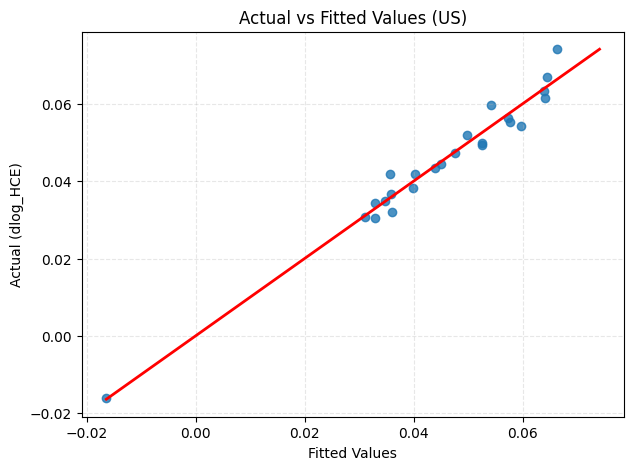

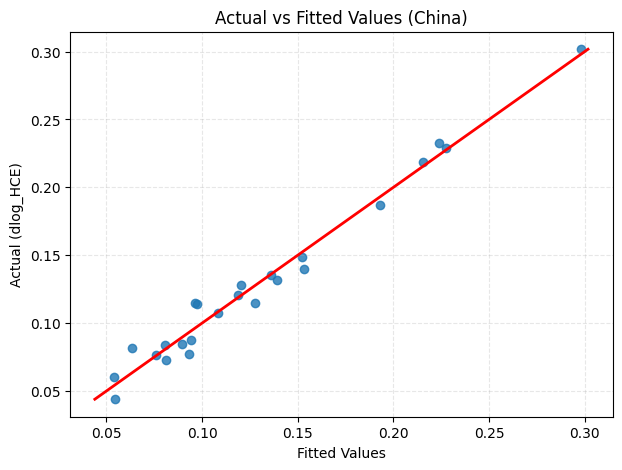

RMSE (US): 0.0031199595411026196
RMSE (China): 0.009432801332423644


In [134]:
import matplotlib.pyplot as plt
import numpy as np

list_rows = [
    "dlog_GNI (current US$)",
    "dlog_Population, total",
    "dlog_General government final consumption expenditure (current US$)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Lending interest rate (%)",
    "Inflation, consumer prices (annual %)",
    "crisis_GFC",
    "crisis_AFC"
]

formula_us = "dlog_HCE ~ " + " + ".join([f"Q('{v}')" for v in list_rows])
model_us = smf.ols(formula_us, data=dfus).fit()

formula_china = "dlog_HCE ~ " + " + ".join([f"Q('{v}')" for v in list_rows])
model_china = smf.ols(formula_china, data=dfchina).fit()


def plot_actual_vs_fitted(model, df, title):
    actual = df["dlog_HCE"]
    fitted = model.fittedvalues

    plt.figure(figsize=(7,5))
    
    # Scatter
    plt.scatter(fitted, actual, alpha=0.8)

    # 45-degree line reference
    line_min = min(fitted.min(), actual.min())
    line_max = max(fitted.max(), actual.max())
    plt.plot([line_min, line_max], [line_min, line_max], color='red', linewidth=2)

    plt.xlabel("Fitted Values")
    plt.ylabel("Actual (dlog_HCE)")
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

# Plot for US
plot_actual_vs_fitted(model_us, dfus, "Actual vs Fitted Values (US)")

# Plot for China
plot_actual_vs_fitted(model_china, dfchina, "Actual vs Fitted Values (China)")

from sklearn.metrics import mean_squared_error
import numpy as np

# US RMSE
rmse_us = np.sqrt(mean_squared_error(dfus["dlog_HCE"], model_us.fittedvalues))

# China RMSE
rmse_china = np.sqrt(mean_squared_error(dfchina["dlog_HCE"], model_china.fittedvalues))

print("RMSE (US):", rmse_us)
print("RMSE (China):", rmse_china)



In [126]:
dfus['country'] = 'US'
dfchina['country'] = 'China'

df_all = pd.concat([dfus, dfchina])


/var/folders/lb/0fsfxq2j6pqf8tx_k2gr0v780000gn/T/ipykernel_99162/3423300599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['country'] = 'US'
/var/folders/lb/0fsfxq2j6pqf8tx_k2gr0v780000gn/T/ipykernel_99162/3423300599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfchina['country'] = 'China'


In [127]:
df_all['is_china'] = (df_all['country'] == 'China').astype(int)

df_all

,Year,dlog_HCE,dlog_GNI (current US$),"dlog_Population, total",dlog_General government final consumption expenditure (current US$),Lending interest rate (%),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",crisis_GFC,crisis_AFC,country,is_china
1,1995,0.049915,0.047746,0.011908,0.029908,8.829167,5.650,2.805420,0,0,US,0
2,1996,0.055270,0.055340,0.011634,0.026914,8.270833,5.451,2.931204,0,0,US,0
3,1997,0.054217,0.059505,0.012040,0.039814,8.441667,5.000,2.337690,0,1,US,0
4,1998,0.059674,0.054238,0.011657,0.037847,8.354167,4.511,1.552279,0,1,US,0
5,1999,0.066880,0.062109,0.011483,0.064030,7.994167,4.219,2.188027,0,0,US,0
6,2000,0.074116,0.062909,0.011128,0.061805,9.233333,3.992,3.376857,0,0,US,0
7,2001,0.044314,0.032779,0.009897,0.067614,6.921667,4.731,2.826171,0,0,US,0
8,2002,0.038158,0.031715,0.009278,0.067656,4.675000,5.783,1.586032,0,0,US,0
9,2003,0.051942,0.048035,0.008595,0.059306,4.122500,5.989,2.270095,0,0,US,0
10,2004,0.061526,0.065458,0.009255,0.058679,4.340000,5.529,2.677237,0,0,US,0


In [132]:
# formula_pooled = '''
# dlog_HCE ~ 
#     Q("dlog_GNI (current US$)") +
#     Q("dlog_Population, total") +
#     Q("dlog_General government final consumption expenditure (current US$)") +
#     Q("dlog_Unemployment, total (% of total labor force) (modeled ILO estimate)") +
#     Q("Lending interest rate (%)") +
#     Q("Inflation, consumer prices (annual %)") +
#     Q("crisis_GFC") +
#     Q("crisis_AFC") +
#     country +
#     country:Q("dlog_GNI (current US$)") +
#     country:Q("dlog_Population, total") +
#     country:Q("dlog_General government final consumption expenditure (current US$)") +
#     country:Q("dlog_Unemployment, total (% of total labor force) (modeled ILO estimate)") +
#     country:Q("Lending interest rate (%)") +
#     country:Q("Inflation, consumer prices (annual %)") +
#     country:Q("crisis_GFC") +
#     country:Q("crisis_AFC")
# '''

formula_pooled = "dlog_HCE ~ country * (" \
    "Q('dlog_GNI (current US$)') + " \
    "Q('dlog_Population, total') + " \
    "Q('dlog_General government final consumption expenditure (current US$)') + " \
    "Q('Unemployment, total (% of total labor force) (modeled ILO estimate)') + " \
    "Q('Lending interest rate (%)') + " \
    "Q('Inflation, consumer prices (annual %)') + " \
    "Q('crisis_AFC') + " \
    "Q('crisis_GFC')" \
")"


# vars_macro = [
#     "dlog_GNI (current US$)",
#     "dlog_Population, total",
#     "dlog_General government final consumption expenditure (current US$)",
#     "Unemployment, total (% of total labor force) (modeled ILO estimate)",
#     "Lending interest rate (%)",
#     "Inflation, consumer prices (annual %)"
# ]


# for v in vars_macro:
#     df_all[f'{v}_interaction'] = df_all[v] * df_all['is_china']


In [133]:
# formula = "dlog_HCE ~ " + \
#           " + ".join(xlinear + ['is_china'] +
#                      [v+"_interaction" for v in xlinear])

model_pooled = smf.ols(formula_pooled, data=df_all).fit()
print(model_pooled.summary())

                            OLS Regression Results                            
Dep. Variable:               dlog_HCE   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           1.23e-23
Time:                        01:04:47   Log-Likelihood:                 169.89
No. Observations:                  48   AIC:                            -303.8
Df Residuals:                      30   BIC:                            -270.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [90]:
import statsmodels.formula.api as smf
import numpy as np

# Base macro variable list you used in pooled model
vars_macro = [
    "dlog_GNI (current US$)",
    "dlog_Population, total",
    "dlog_General government final consumption expenditure (current US$)",
    "dlog_Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Lending interest rate (%)",
    "Inflation, consumer prices (annual %)"
]

# Crisis variables you want in both countries
crisis_vars = ["crisis_AFC", "crisis_GFC"]   # only AFC and GFC per your note

# Build pooled formula:
# - For each macro var we include interaction with country via Patsy: Q("var") * country
# - For each crisis, include crisis + crisis*country (use * to allow different effects by country)
macro_terms = " + ".join([f'Q("{v}") * country' for v in vars_macro])
crisis_terms = " + ".join([f"{c} * country" for c in crisis_vars])

formula_pooled = "dlog_HCE ~ " + macro_terms
if crisis_terms:
    formula_pooled += " + " + crisis_terms

print("Pooled formula:\n", formula_pooled)

# Fit pooled model with robust standard errors
model_pooled = smf.ols(formula_pooled, data=df_all).fit(cov_type='HC3')
print(model_pooled.summary())

# (Optional) Fit China-only and US-only models if you haven't:
model_china = smf.ols("dlog_HCE ~ " + " + ".join([f'Q("{v}")' for v in vars_macro] + crisis_vars),
                      data=dfchina).fit(cov_type='HC3')
model_us = smf.ols("dlog_HCE ~ " + " + ".join([f'Q("{v}")' for v in vars_macro] + crisis_vars),
                   data=dfus).fit(cov_type='HC3')

# Compare dlog_GNI coefficients (example)
china_main = model_china.params.get('Q("dlog_GNI (current US$)")')
pooled_main = model_pooled.params.get('Q("dlog_GNI (current US$)")')

print("China only dlog_GNI coef:", china_main)
print("Pooled main dlog_GNI coef (China baseline):", pooled_main)
print("Difference (pooled - china):", pooled_main - china_main)


Pooled formula:
 dlog_HCE ~ Q("dlog_GNI (current US$)") * country + Q("dlog_Population, total") * country + Q("dlog_General government final consumption expenditure (current US$)") * country + Q("dlog_Unemployment, total (% of total labor force) (modeled ILO estimate)") * country + Q("Lending interest rate (%)") * country + Q("Inflation, consumer prices (annual %)") * country + crisis_AFC * country + crisis_GFC * country
                            OLS Regression Results                            
Dep. Variable:               dlog_HCE   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2662.
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           6.03e-43
Time:                        20:25:51   Log-Likelihood:                 171.35
No. Observations:                  48   AIC:                            -306.7
Df Residuals:         

In [92]:
required = ["dlog_HCE"] + vars_macro + crisis_vars + ["country"]
df_all_clean = df_all.dropna(subset=required)

# then split back
dfchina_clean = df_all_clean[df_all_clean['country']=="China"]
dfus_clean = df_all_clean[df_all_clean['country']=="US"]

# fit models on these cleaned sets


dfchina_clean

,dlog_HCE,dlog_GNI (current US$),"dlog_Population, total",dlog_General government final consumption expenditure (current US$),Lending interest rate (%),"dlog_Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",crisis_GFC,crisis_AFC,country,is_china
0,0.301700,0.249718,0.010865,0.206988,12.06,0.033902,16.791225,0,0,China,1
1,0.186829,0.164245,0.010481,0.154442,10.08,0.039221,8.313160,0,0,China,1
2,0.087823,0.111171,0.010235,0.149331,8.64,0.034649,2.786465,0,1,China,1
3,0.060332,0.064497,0.009596,0.151416,6.39,0.003091,-0.773186,0,1,China,1
4,0.077549,0.065318,0.008659,0.151934,5.85,0.003082,-1.401473,0,0,China,1
5,0.114296,0.104266,0.007880,0.131271,5.85,0.003072,0.347811,0,0,China,1
6,0.076281,0.099709,0.007264,0.076992,5.85,0.153274,0.719126,0,0,China,1
7,0.081919,0.098997,0.006700,0.073952,5.31,0.109562,-0.731971,0,0,China,1
8,0.072810,0.126453,0.006229,0.074465,5.31,0.077136,1.127603,0,0,China,1
9,0.114818,0.167596,0.005939,0.118707,5.58,-0.019846,3.824637,0,0,China,1


In [101]:
# === 0) Imports (if not already imported) ===
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# === 1) Specify variable lists (use the exact column names in your df_all) ===
vars_macro = [
    "dlog_GNI (current US$)",
    "dlog_Population, total",
    "dlog_General government final consumption expenditure (current US$)",
    "dlog_Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Lending interest rate (%)",
    "Inflation, consumer prices (annual %)"
]

# per your note: only AFC and GFC
crisis_vars = ["crisis_AFC", "crisis_GFC"]

# === 2) Ensure country is categorical and set China as the baseline ===
# If your df_all['country'] already contains "China" and "US", do:
df_all['country'] = pd.Categorical(df_all['country'], categories=['China', 'US'])

# === 3) Keep a common cleaned sample (important!) ===
required = ["dlog_HCE"] + vars_macro + crisis_vars + ["country"]
df_all_clean = df_all.dropna(subset=required).reset_index(drop=True)

# optional: print counts to check
print("Observations after cleaning:", len(df_all_clean))
print("Countries in sample:", df_all_clean['country'].unique())

# === 4) Build pooled formula including crisis dummies and interactions ===
# Use country*(macros) to automatically include main + interaction for macros.
macros_part = " + ".join([f'Q("{v}")' for v in vars_macro])

# For crises, include main effect (applies to China) and interaction with country (US diff)
# We'll expand as: crisis + crisis:country
crisis_part = " + ".join([f"{c} + {c}:country" for c in crisis_vars])

formula_pooled = f'dlog_HCE ~ country * ({macros_part})'
if crisis_part:
    formula_pooled += " + " + crisis_part

print("\nPooled formula:\n", formula_pooled)

# === 5) Fit pooled model with robust SEs (HC3) ===
model_pooled = smf.ols(formula_pooled, data=df_all_clean).fit(cov_type='HC3')
print(model_pooled.summary())

# === 6) Joint test: are ALL slope interactions (country×macro) = 0? ===
# We'll programmatically pick interaction parameter names from the model to avoid naming issues.
param_names = model_pooled.params.index.tolist()

# pick parameters that are interaction terms between a macro (or crisis) and country.
# We exclude the pure 'country[T.US]' intercept difference.
interactions = [n for n in param_names
                if (":country[T.US]" in n or ":country" in n or "country[T.US]:" in n)
                and n != "country[T.US]"]

# interactions now contains names like 'Q("dlog_GNI (current US$)"):country[T.US]' etc.
print("\nInteraction parameters found (will be jointly tested):")
for name in interactions:
    print(" ", name)






Observations after cleaning: 48
Countries in sample: ['US', 'China']
Categories (2, object): ['China', 'US']

Pooled formula:
 dlog_HCE ~ country * (Q("dlog_GNI (current US$)") + Q("dlog_Population, total") + Q("dlog_General government final consumption expenditure (current US$)") + Q("dlog_Unemployment, total (% of total labor force) (modeled ILO estimate)") + Q("Lending interest rate (%)") + Q("Inflation, consumer prices (annual %)")) + crisis_AFC + crisis_AFC:country + crisis_GFC + crisis_GFC:country
                            OLS Regression Results                            
Dep. Variable:               dlog_HCE   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2662.
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           6.03e-43
Time:                        20:36:39   Log-Likelihood:                 171.35
No. Observations: